In [237]:
library(tidyverse)
library(lubridate)
library(scales)
library(svglite)
library(ggforce)

In [238]:
# Load the full dataset from reduced_df_joined_filtered.csv
filtered_df <- read_csv("data/records_df_filtered.csv")

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 22275 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (12): doc_id, doi, title, abstract, doc_type, publisher, source_title, a...
dbl  (4): year, topic_id, examples, timing

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [22]:
filtered_df %>%
    filter(year == 2022) %>%
    group_by((label_name)) %>%
    summarize(count = n()) %>%
    arrange(desc(count))

(label_name),count
<chr>,<int>
Prognostics,333
Statistics,245
Maintenance,191
Quality Control,187
Management,154
Physics of Failure,127
Modeling,126
Risk Assessment,105


In [242]:
# Arrange topics manually (we choose ascending order of count in 2022)
topics <- c(
    "Risk Assessment", 
    "Modeling", 
    "Physics of Failure",
    "Management", 
    "Quality Control", 
    "Maintenance", 
    "Statistics", 
    "Prognostics"
    )

In [189]:
filtered_df %>%
    summarize(count = n())

count
<int>
22275


Rows: 30491 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): doc_id
dbl (2): x, y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


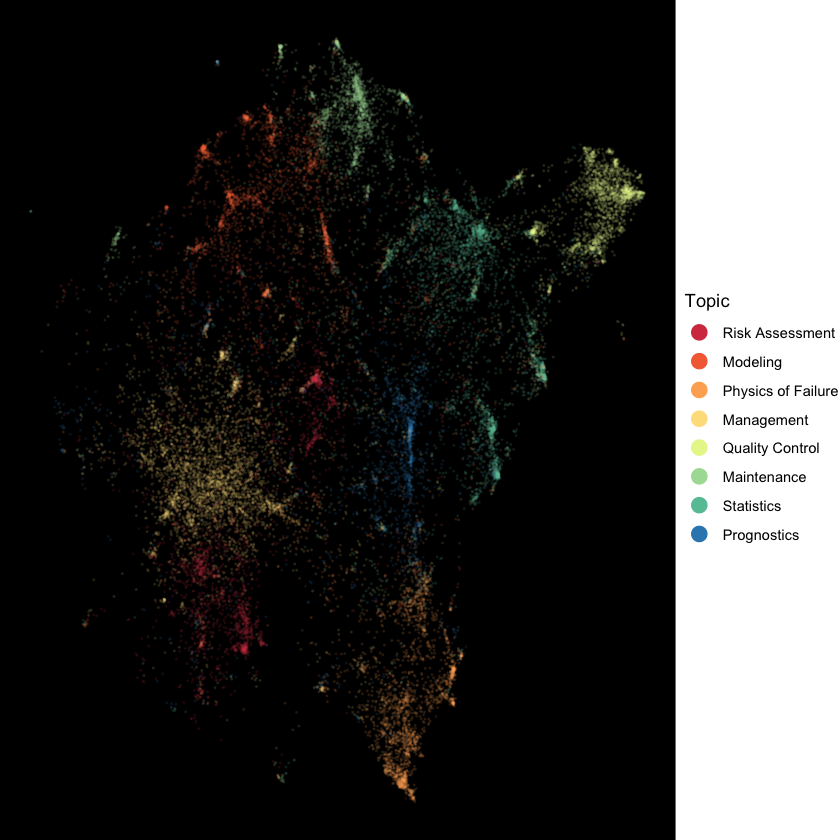

In [190]:
transform_df <- read_csv("data/transform_df.csv")
filtered_df %>%
    left_join(transform_df, by = "doc_id") %>%
    ggplot(aes(x = x, y = y, color = factor(label_name, levels=topics))) +
    geom_point(size = 0.2, alpha = 0.1) +
    theme_void() + 
    scale_color_brewer(palette="Spectral") +
    labs(
        color = "Topic",
        # title = "Reliability paper clustering"
    ) +
    guides(colour = guide_legend(override.aes = list(alpha = 1, size=4))) +
    theme(
        plot.title = element_text(hjust = 0.5, margin = margin(t = 0, r = 0, b = 10, l = 0)),
        panel.background = element_rect(fill = 'black', color = 'black')    )
ggsave("figures/res_paper_clustering.svg", width=6, height=4, dpi=300)

# Topics over time

`summarise()` has grouped output by 'label_name'. You can override using the
`.groups` argument.


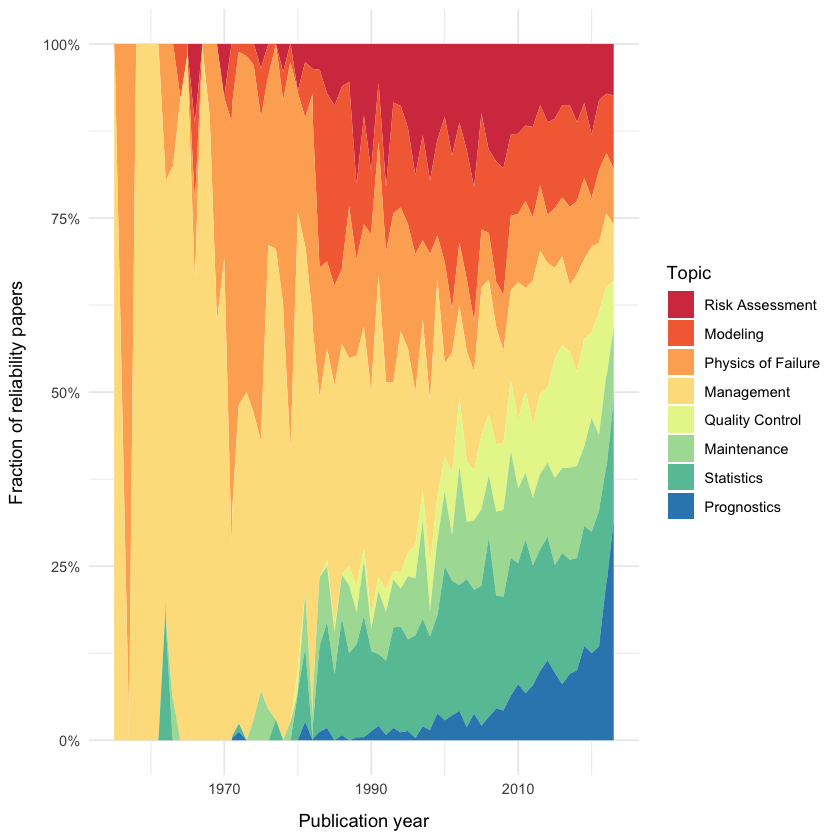

In [213]:
# Account for missing years
all_values <- expand.grid(
    label_name = unique(filtered_df$label_name),
    year = unique(filtered_df$year)
)

summary_df <- filtered_df %>%
    group_by(label_name, year) %>%
    summarise(count = n()) %>%
    ungroup()

summary_df <- full_join(all_values, summary_df, by = c("label_name", "year")) %>%
    replace_na(list(count = 0))

summary_df %>%
ggplot(aes(x=year, y=count, fill = factor(label_name, levels=topics))) +
geom_area(position="fill") +
theme_minimal() +
labs(
  # title = "Fraction of topics in reliability literature over time",
  x = "Publication year",
  y = "Fraction of reliability papers",
  fill = "Topic",
) +
theme(
  axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0)),
  axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0))
  ) +
scale_fill_brewer(palette="Spectral") +
scale_y_continuous(labels=scales::percent)
ggsave("figures/res_topics_over_time_fill.svg", width=6, height=4, dpi=300)

`summarise()` has grouped output by 'label_name'. You can override using the
`.groups` argument.


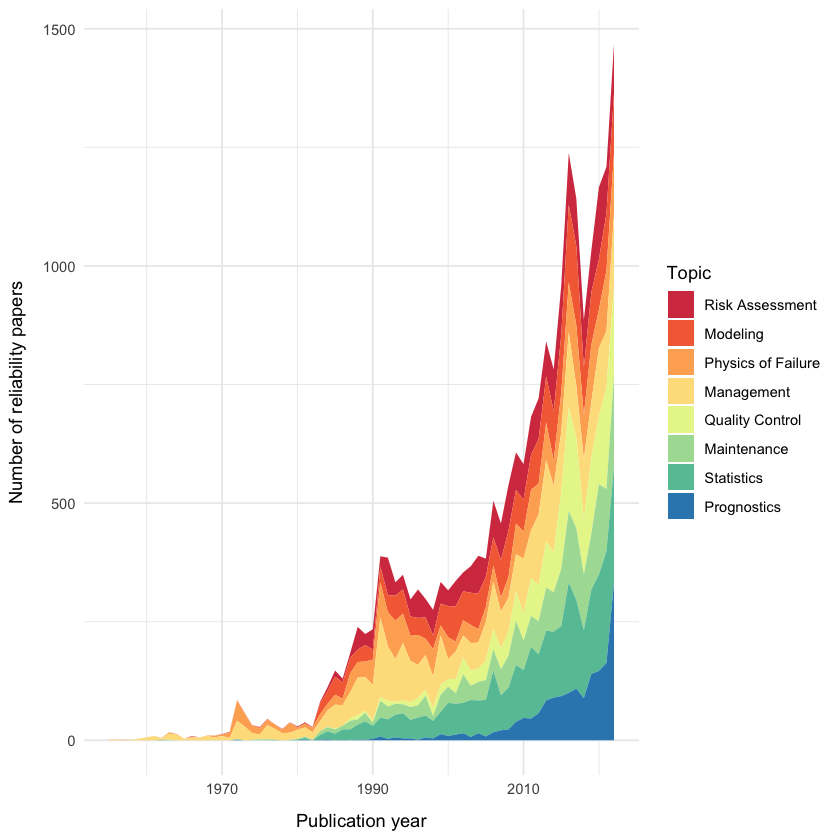

In [212]:
# Account for missing years
all_values <- expand.grid(
    label_name = unique(filtered_df$label_name),
    year = unique(filtered_df$year)
)

summary_df <- filtered_df %>%
    group_by(label_name, year) %>%
    summarise(count = n()) %>%
    ungroup()

summary_df <- full_join(all_values, summary_df, by = c("label_name", "year")) %>%
    replace_na(list(count = 0))

summary_df %>%
  filter(year < 2023) %>%
  ggplot(aes(x=year, y=count, fill = factor(label_name, levels=topics))) +
  geom_area(stat="identity") +
  theme_minimal() +
  labs(
    # title = "Count of topics in reliability literature over time",
    x = "Publication year",
    y = "Number of reliability papers",
    fill = "Topic",
  ) +
  theme(
    axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0)),
    axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0))
    ) +  
  scale_fill_brewer(palette="Spectral")
ggsave("figures/res_topics_over_time_count.svg", width=6, height=4, dpi=300)

In [273]:
filtered_df %>%
    group_by(year, label_name) %>%
    summarise(count = n()) %>%
    filter(year < 2023) %>%
    group_by(label_name) %>%
    mutate(growth_rate = (count - lag(count)) / lag(count)) %>%
    ungroup() %>%
    summarize(growth_rate = 100*mean(growth_rate, na.rm = TRUE)) %>%
    arrange(desc(growth_rate))

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


growth_rate
<dbl>
34.50051


`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 8 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 8 rows containing non-finite values (`stat_smooth()`).”


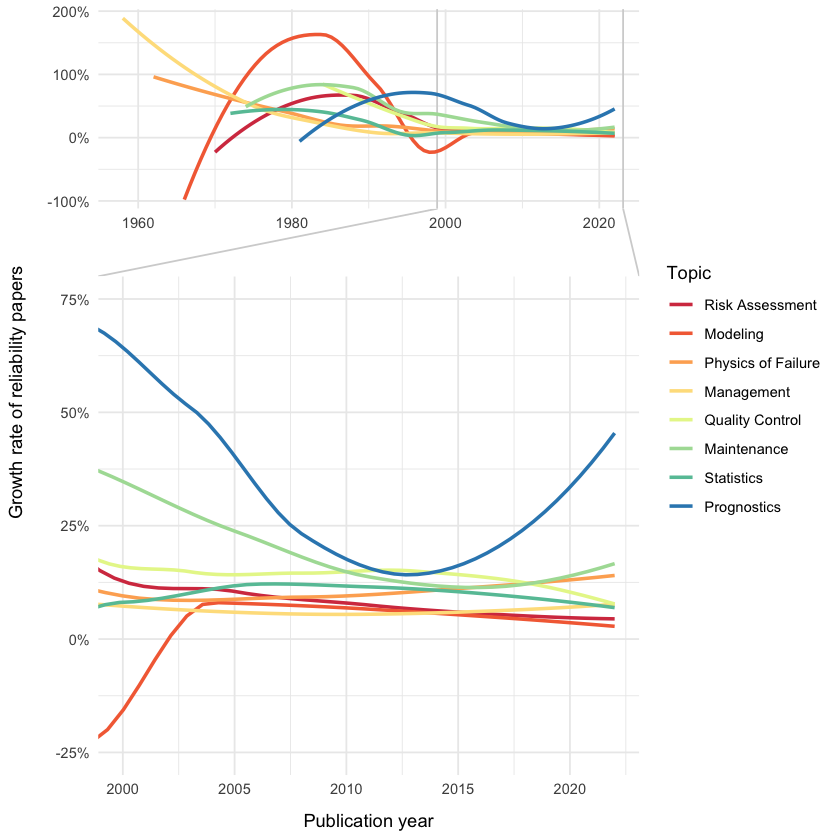

In [253]:
# Growth rate

filtered_df %>%
    group_by(year, label_name) %>%
    summarise(count = n()) %>%
    filter(year < 2023) %>%
    group_by(label_name) %>%
    mutate(growth_rate = (count - lag(count)) / lag(count)) %>%
    ggplot(aes(x=year, y=growth_rate, fill = factor(label_name, levels=topics), color = factor(label_name, levels=topics))) +
    geom_smooth(span = 0.8, se=FALSE) +
    # geom_ribbon(stat="smooth", method="lm", fill=NA, linetype="dashed") +
    theme_bw() +
    labs(
        # title = "Growth rate of topics in reliability literature over time",
        x = "Publication year",
        y = "Growth rate of reliability papers",
        color = "Topic",
    ) +
    theme(
        axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0)),
        axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
        panel.border = element_blank(),
        axis.ticks.x = element_blank(),
        axis.ticks.y = element_blank(),
        zoom.x = element_rect(fill = NA, color = "lightgray"),
        zoom.y = element_rect(fill = NA, color = NA)
        ) +
    scale_color_brewer(palette="Spectral") +
    scale_fill_brewer(palette="Spectral") +
    guides(fill = "none") +
    facet_zoom(xlim=c(2000, 2022), ylim=c(-0.25, 0.75), zoom.size=2.5, horizontal=FALSE) +
    scale_y_continuous(labels=scales::percent)

ggsave("figures/res_topic_growth.svg", width=6, height=7, dpi=300)

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


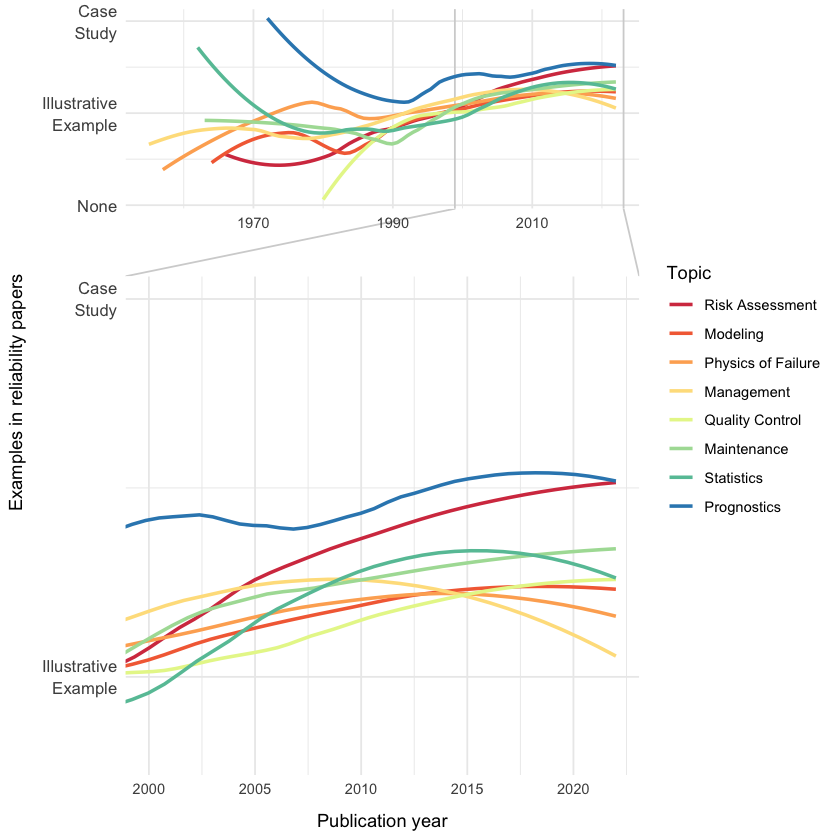

In [254]:
# Mean example score by year for each topic
filtered_df %>%
    filter(year < 2023) %>%
    group_by(year, label_name) %>%
    summarise(example_score = mean(examples, na.rm=TRUE)) %>%
    ggplot(aes(x=year, y=example_score, fill = factor(label_name, levels=topics), color = factor(label_name, levels=topics))) +
    geom_smooth(span = 0.6, se=FALSE) +
    # geom_line() +
    theme_bw() +
    labs(
        # title = "Mean example content of topics in reliability literature over time",
        x = "Publication year",
        y = "Examples in reliability papers",
        color = "Topic",
    ) +
    theme(
        axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0)),
        axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
        panel.border = element_blank(),
        axis.ticks.x = element_blank(),
        axis.ticks.y = element_blank(),
        zoom.x = element_rect(fill = NA, color = "lightgray"),
        zoom.y = element_rect(fill = NA, color = NA),
        axis.text.y = element_text(lineheight = 1.1, size = 10)
        ) +
    scale_color_brewer(palette="Spectral") +
    scale_fill_brewer(palette="Spectral") +
    guides(fill = "none") +
    scale_y_continuous(breaks=c(0, 1, 2), labels=c("None", "Illustrative\nExample", "Case\nStudy")) +
    facet_zoom(xlim=c(2000, 2022), ylim=c(0.8, 2), zoom.size=2.5, horizontal=FALSE)

    ggsave("figures/res_example_score.svg", width=6, height=7, dpi=300)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 1 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 1 rows containing non-finite values (`stat_smooth()`).”


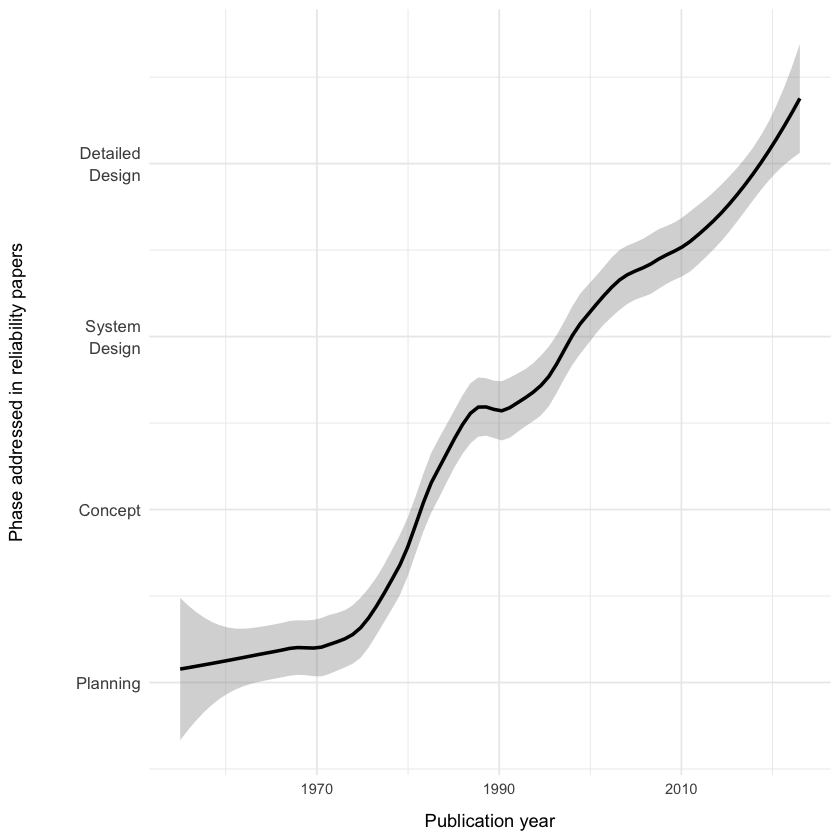

In [232]:
# Mean timing score over time
filtered_df %>%
    group_by(year) %>%
    summarise(timing_score = mean(timing, na.rm=TRUE)) %>%
    ggplot(aes(x=year, y=timing_score)) +
    geom_smooth(span = 0.4, color = "black") +
    # geom_line() +
    theme_minimal() +
    labs(
        # title = "Mean timing of reliability activities over time",
        x = "Publication year",
        y = "Phase addressed in reliability papers",
    ) +
    theme(
        axis.title.y = element_text(margin = margin(t = 0, r = 30, b = 0, l = 0)),
        axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
        axis.text.y = element_text(lineheight = 1.1, size = 10)

        ) +
    scale_y_continuous(breaks=c(1, 2, 3, 4, 5, 6), labels=c("Planning", "Concept", "System\nDesign", "Detailed\nDesign", "Testing", "Production"))


ggsave("figures/res_timing_score.svg", width=6, height=4, dpi=300)

# Subtopic plots

In [262]:
plot_fill <- function(data_filename, plot_filename, title) {

    # For cases with comma separated terms, take only the first three
    input_df <- read_csv(data_filename) %>%
        mutate(sub_label = strsplit(sub_label, ", ") %>%
        sapply(function(x) paste(x[1:3], collapse=", ")))

    # Account for missing years
    all_values <- expand.grid(
        sub_label = unique(input_df$sub_label),
        year = unique(input_df$year)
    )

    summary_df <- input_df %>%
        group_by(sub_label, year) %>%
        summarise(count = n()) %>%
        ungroup()

    summary_df <- full_join(all_values, summary_df, by = c("sub_label", "year")) %>%
        replace_na(list(count = 0))

    p <- summary_df %>%
        ggplot(aes(x=year, y=count, fill = factor(sub_label))) +
        geom_area(position="fill") +
        theme_minimal() +
        labs(
            # title = paste0("Fraction of topics in the ", title, " subtopic over time"),
            x = "Publication year",
            y = paste0("Fraction of ", title, " reliability papers"),
            fill = "Topic",
        ) +
        theme(
            axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0)),
            axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0))
            ) +
        scale_fill_brewer(palette="Spectral") +
        scale_y_continuous(labels=scales::percent)
    print(p)
    ggsave(plot_filename, width=6, height=4, dpi=300)
}

plot_count <- function(data_filename, plot_filename, title) {

    # For cases with comma separated terms, take only the first three
    input_df <- read_csv(data_filename) %>%
        mutate(sub_label = strsplit(sub_label, ", ") %>%
        sapply(function(x) paste(x[1:3], collapse=", ")))

    # Account for missing years
    all_values <- expand.grid(
        sub_label = unique(input_df$sub_label),
        year = unique(input_df$year)
    )

    summary_df <- input_df %>%
        group_by(sub_label, year) %>%
        summarise(count = n()) %>%
        ungroup()

    summary_df <- full_join(all_values, summary_df, by = c("sub_label", "year")) %>%
        replace_na(list(count = 0))

    p <- summary_df %>%
        filter(year < 2023) %>%
        ggplot(aes(x=year, y=count, fill = factor(sub_label))) +
        geom_area(stat="identity") +
        theme_minimal() +
        labs(
            # title = paste0("Count of topics in the ", title, " subtopic over time"),
            x = "Publication year",
            y = paste0("Count of ", title, " reliability papers"),
            fill = "Topic",
        ) +
        theme(
            axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0)),
            axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0))
            ) +  
        scale_fill_brewer(palette="Spectral")
    print(p)
    ggsave(plot_filename, width=6, height=4, dpi=300)
}

plot_growth <- function(data_filename, plot_filename, title, ylim) {
    p <- read_csv(data_filename) %>%
        mutate(sub_label = strsplit(sub_label, ", ") %>%
        sapply(function(x) paste(x[1:3], collapse=", "))) %>%
        group_by(year, sub_label) %>%
        summarise(count = n()) %>%
        filter(year < 2023) %>%
        group_by(sub_label) %>%
        mutate(growth_rate = (count - lag(count)) / lag(count)) %>%
        ggplot(aes(x=year, y=growth_rate, fill = factor(sub_label), color = factor(sub_label))) +
        geom_smooth(span = 0.8, se=FALSE) +
        theme_bw() +
        labs(
            # title = paste0("Growth rate of topics in the ", title, " subtopic over time"),
            y = paste0("Growth rate of ", title, " reliability papers"),
            x = "Publication year",
            color = "Topic",
        ) +
        theme(
            axis.title.y = element_text(margin = margin(t = 0, r = 30, b = 0, l = 0)),
            axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
            panel.border = element_blank(),
            axis.ticks.x = element_blank(),
            axis.ticks.y = element_blank(),
            zoom.x = element_rect(fill = NA, color = "lightgray"),
            zoom.y = element_rect(fill = NA, color = NA)
            ) +
        scale_color_brewer(palette="Spectral") +
        scale_fill_brewer(palette="Spectral") +
        guides(fill = "none") +
        facet_zoom(xlim=c(2000, 2022), ylim=ylim, zoom.size=2.5, horizontal=FALSE) +
        scale_y_continuous(labels=scales::percent)
    print(p)
    ggsave(plot_filename, width=6, height=7, dpi=300)
}

plot_examples <- function(data_filename, plot_filename, title, ylim) {
    p <- read_csv(data_filename) %>%
        mutate(sub_label = strsplit(sub_label, ", ") %>%
        sapply(function(x) paste(x[1:3], collapse=", "))) %>%
        filter(year < 2023, examples %in% c(0, 1, 2)) %>%
        group_by(year, sub_label) %>%
        summarise(example_score = mean(as.numeric(examples), na.rm=TRUE)) %>%
        ggplot(aes(x=year, y=example_score, fill = factor(sub_label), color = factor(sub_label))) +
        geom_smooth(span = 0.6, se=FALSE) +
        theme_bw() +
        labs(
            # title = paste0("Mean example content of topics in the ", title, " subtopic over time"),
            x = "Publication year",
            y = paste0("Examples in ", title, " reliability papers"),
            color = "Topic",
        ) +
        theme(
            axis.title.y = element_text(margin = margin(t = 0, r = 30, b = 0, l = 0)),
            axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
            panel.border = element_blank(),
            axis.ticks.x = element_blank(),
            axis.ticks.y = element_blank(),
            zoom.x = element_rect(fill = NA, color = "lightgray"),
            zoom.y = element_rect(fill = NA, color = NA),
            axis.text.y = element_text(lineheight = 1.1, size = 10)
            ) +
        scale_color_brewer(palette="Spectral") +
        scale_fill_brewer(palette="Spectral") +
        scale_y_continuous(breaks=c(0, 1, 2), labels=c("None", "Illustrative\nExample", "Case\nStudy")) +
        guides(fill = "none") +
        facet_zoom(xlim=c(2000, 2022), ylim=ylim, zoom.size=2.5, horizontal=FALSE)
    print(p)
    ggsave(plot_filename, width=6, height=7, dpi=300)
}

# Nuclear subtopic

Rows: 1853 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (12): sub_label, doc_id, doi, title, abstract, doc_type, publisher, sour...
dbl  (4): sub_topic_id, year, topic_id, examples

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'sub_label'. You can override using the
`.groups` argument.


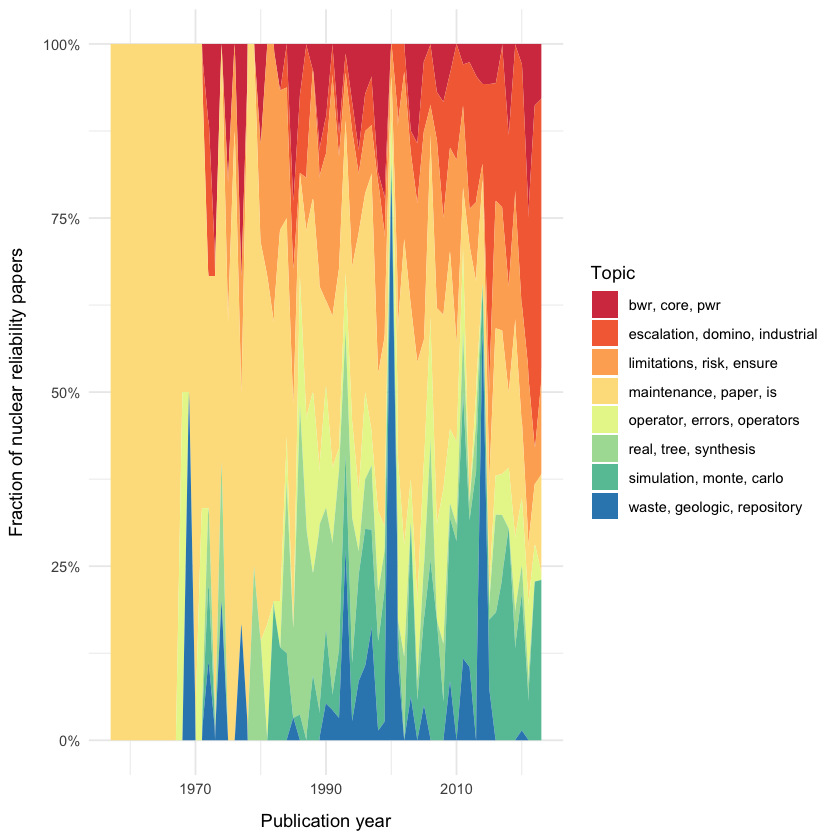

In [206]:
plot_fill("data/subtopics_nuclear.csv", "figures/res_nuclear_over_time_fill.svg", "nuclear")

Rows: 1853 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (12): sub_label, doc_id, doi, title, abstract, doc_type, publisher, sour...
dbl  (4): sub_topic_id, year, topic_id, examples

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'sub_label'. You can override using the
`.groups` argument.


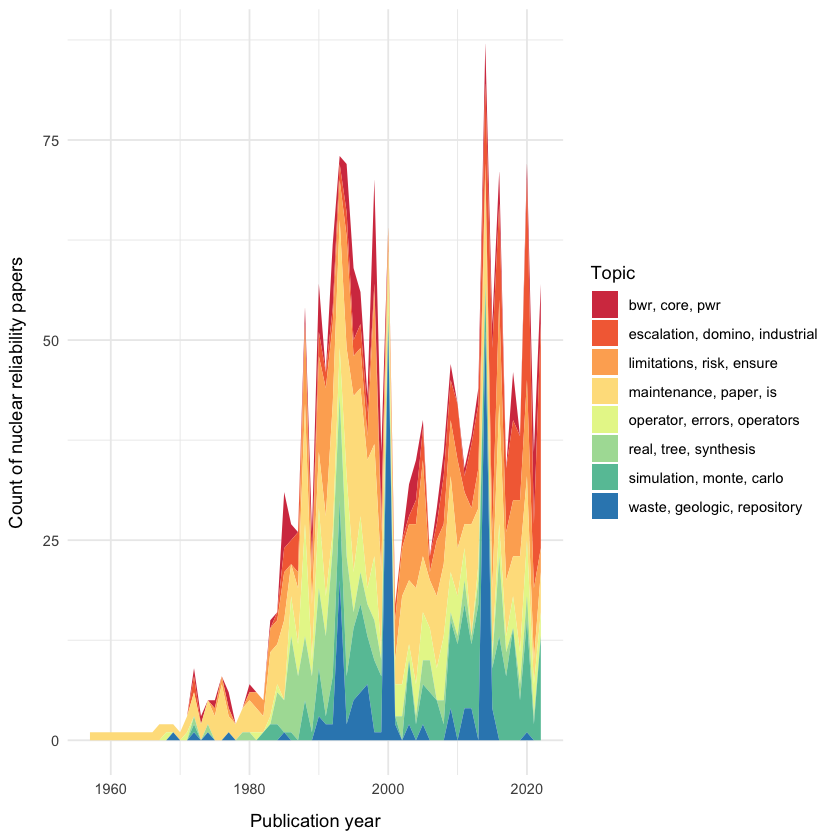

In [207]:
plot_count("data/subtopics_nuclear.csv", "figures/res_nuclear_over_time_count.svg", "nuclear")

Rows: 1853 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (12): sub_label, doc_id, doi, title, abstract, doc_type, publisher, sour...
dbl  (4): sub_topic_id, year, topic_id, examples

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 8 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 8 rows containing non-finite values (`stat_smooth()`).”


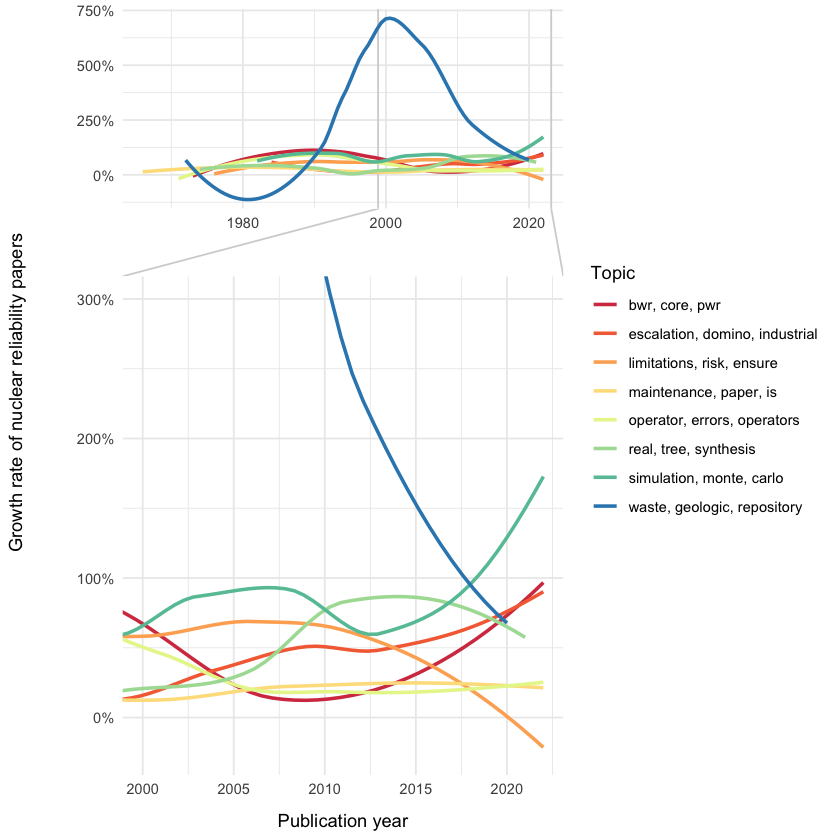

In [263]:
plot_growth("data/subtopics_nuclear.csv", "figures/res_nuclear_topic_growth.svg", "nuclear", ylim=c(-0.25, 3))

Rows: 1853 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (12): sub_label, doc_id, doi, title, abstract, doc_type, publisher, sour...
dbl  (4): sub_topic_id, year, topic_id, examples

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


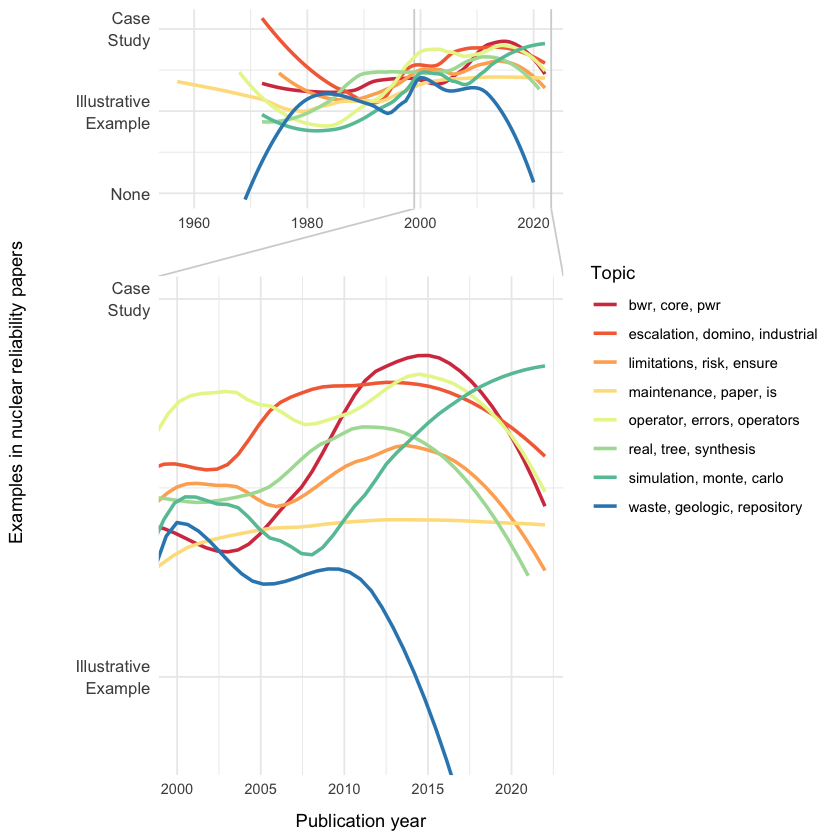

In [257]:
plot_examples("data/subtopics_nuclear.csv", "figures/res_nuclear_example_score.svg", "nuclear", c(0.8, 2))

# Software subtopic

Rows: 4211 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (13): sub_label, doc_id, doi, title, abstract, doc_type, publisher, sour...
dbl  (3): sub_topic_id, year, topic_id

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'sub_label'. You can override using the
`.groups` argument.


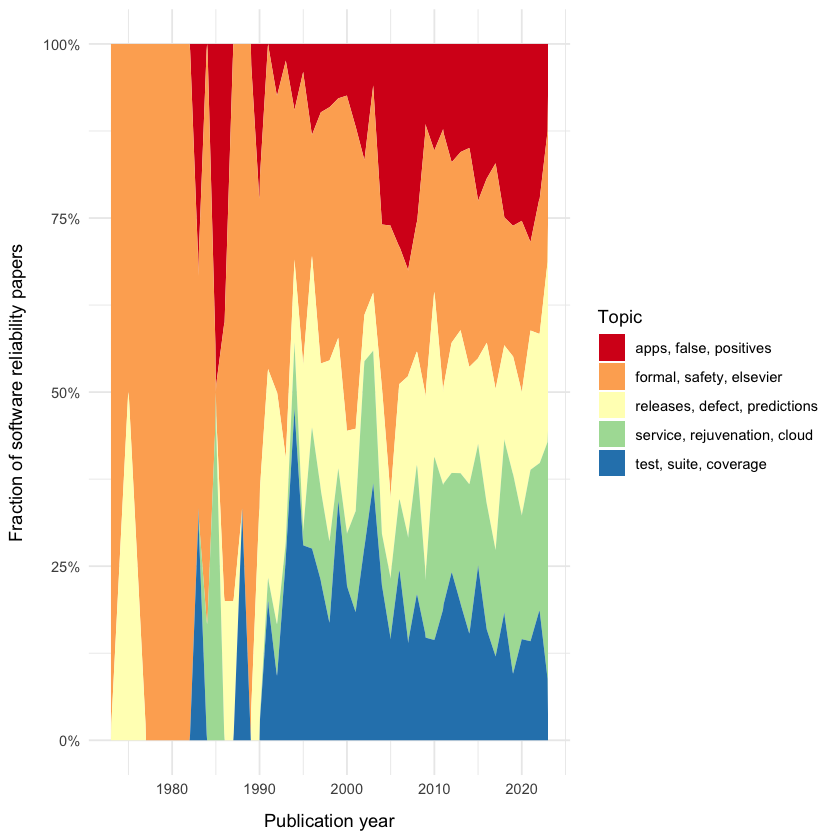

In [215]:
plot_fill("data/subtopics_software.csv", "figures/res_software_over_time_fill.svg", "software")

Rows: 4211 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (13): sub_label, doc_id, doi, title, abstract, doc_type, publisher, sour...
dbl  (3): sub_topic_id, year, topic_id

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'sub_label'. You can override using the
`.groups` argument.


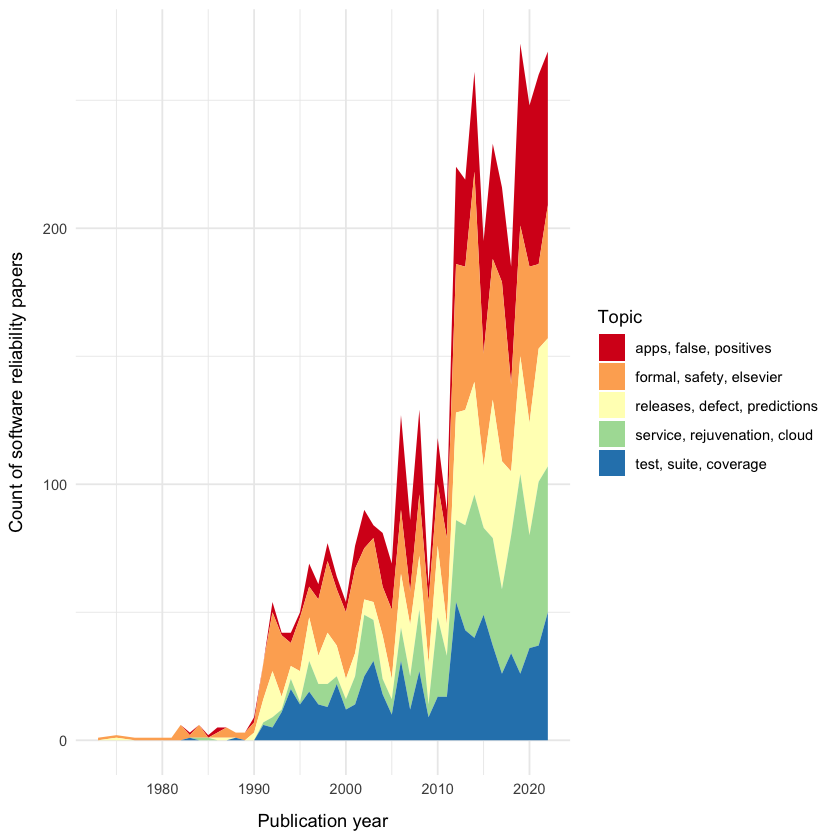

In [216]:
plot_count("data/subtopics_software.csv", "figures/res_software_over_time_count.svg", "software")

Rows: 4211 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (13): sub_label, doc_id, doi, title, abstract, doc_type, publisher, sour...
dbl  (3): sub_topic_id, year, topic_id

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 5 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 5 rows containing non-finite values (`stat_smooth()`).”


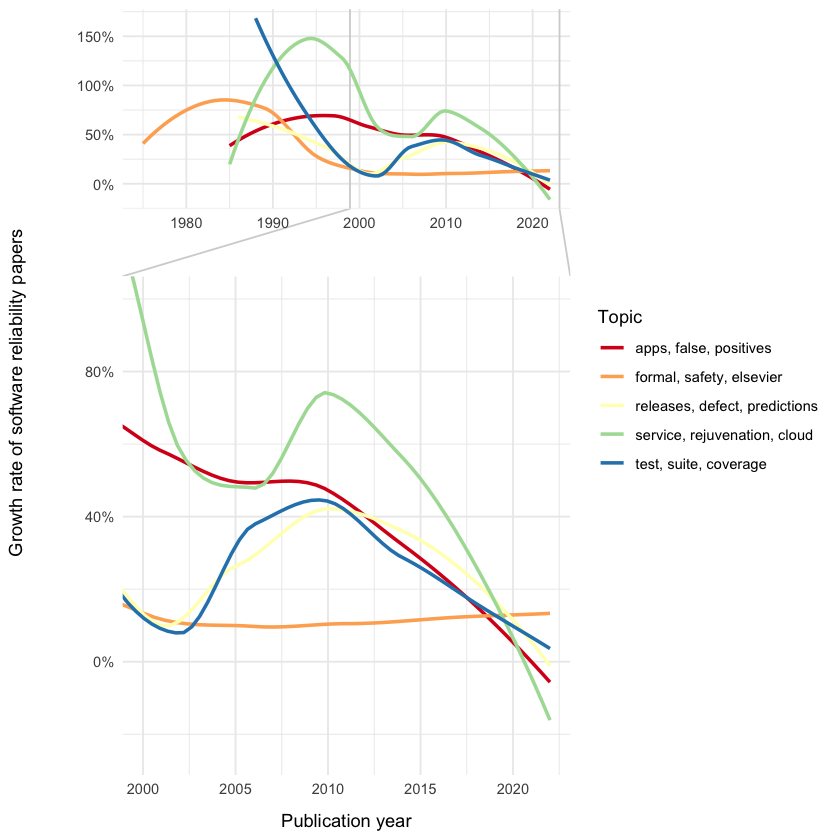

In [264]:
plot_growth("data/subtopics_software.csv", "figures/res_software_topic_growth.svg", "software", ylim=c(-0.25, 1))

Rows: 4211 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (13): sub_label, doc_id, doi, title, abstract, doc_type, publisher, sour...
dbl  (3): sub_topic_id, year, topic_id

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


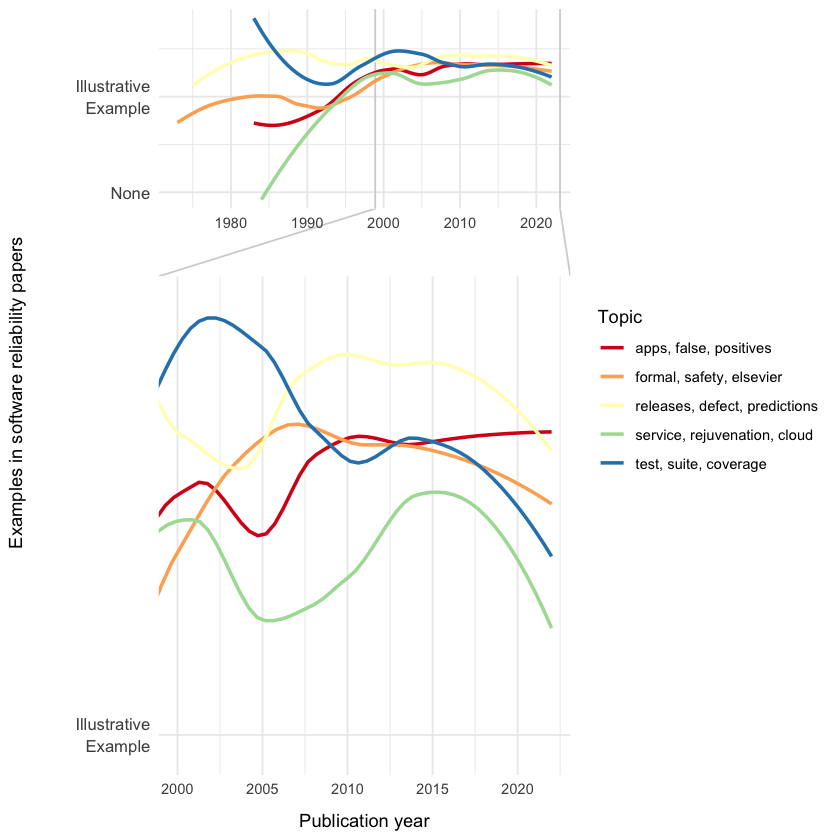

In [259]:
plot_examples("data/subtopics_software.csv", "figures/res_software_example_score.svg", "software", c(0.98, 1.5))

# Infrastructure

Rows: 2204 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (12): sub_label, doc_id, doi, title, abstract, doc_type, publisher, sour...
dbl  (4): sub_topic_id, year, topic_id, examples

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'sub_label'. You can override using the
`.groups` argument.


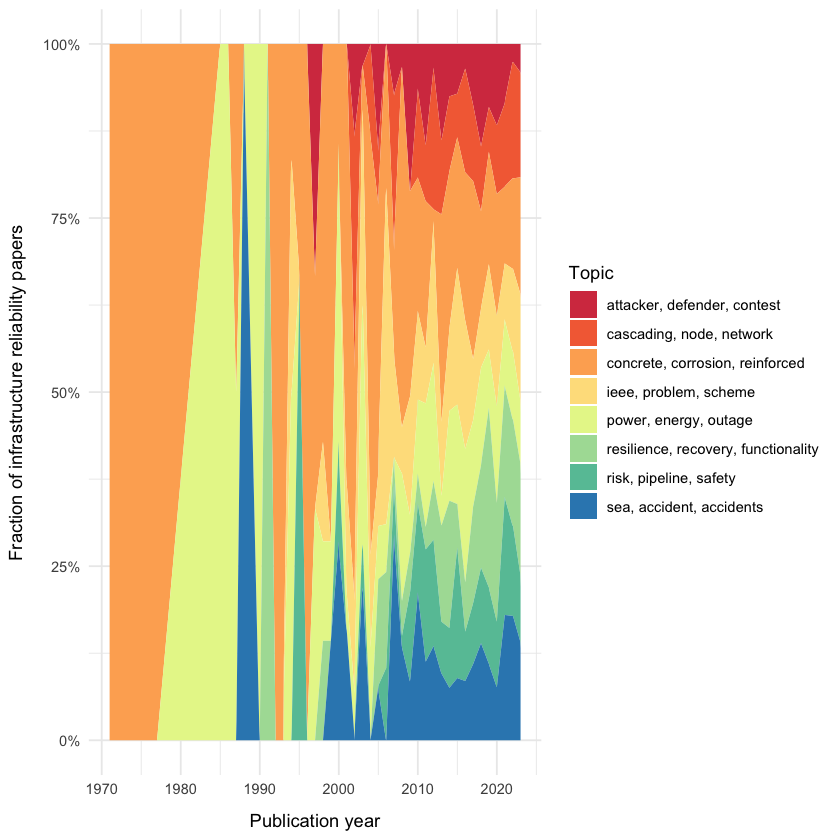

In [219]:
plot_fill("data/subtopics_infrastructure.csv", "figures/res_infrastructure_over_time_fill.svg", "infrastructure")

Rows: 2204 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (12): sub_label, doc_id, doi, title, abstract, doc_type, publisher, sour...
dbl  (4): sub_topic_id, year, topic_id, examples

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'sub_label'. You can override using the
`.groups` argument.


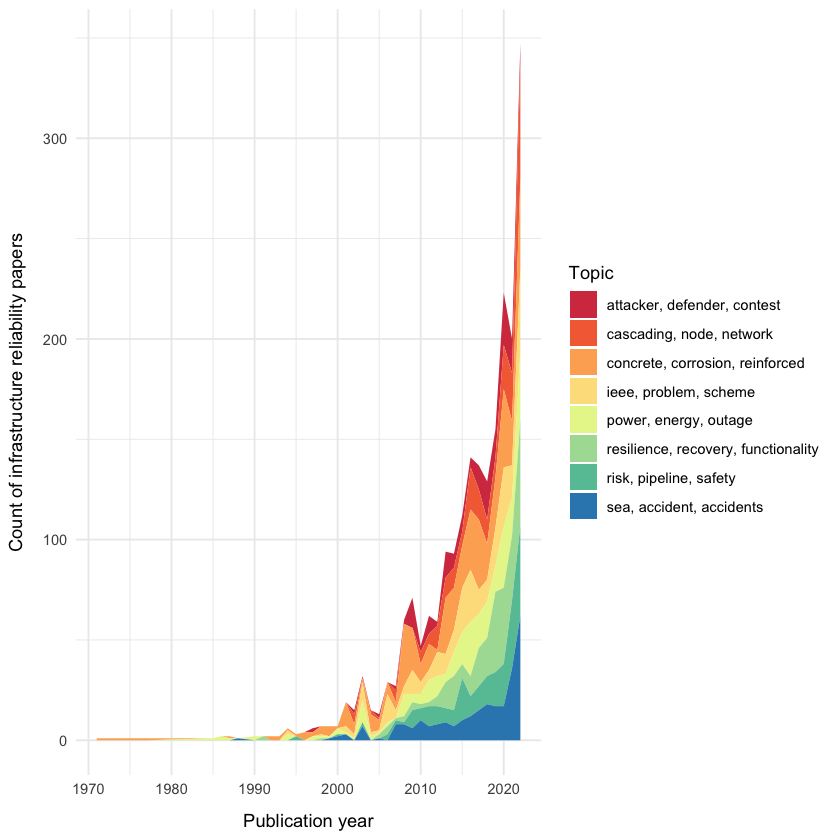

In [220]:
plot_count("data/subtopics_infrastructure.csv", "figures/res_infrastructure_over_time_count.svg", "infrastructure")

Rows: 2204 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (12): sub_label, doc_id, doi, title, abstract, doc_type, publisher, sour...
dbl  (4): sub_topic_id, year, topic_id, examples

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 8 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 8 rows containing non-finite values (`stat_smooth()`).”


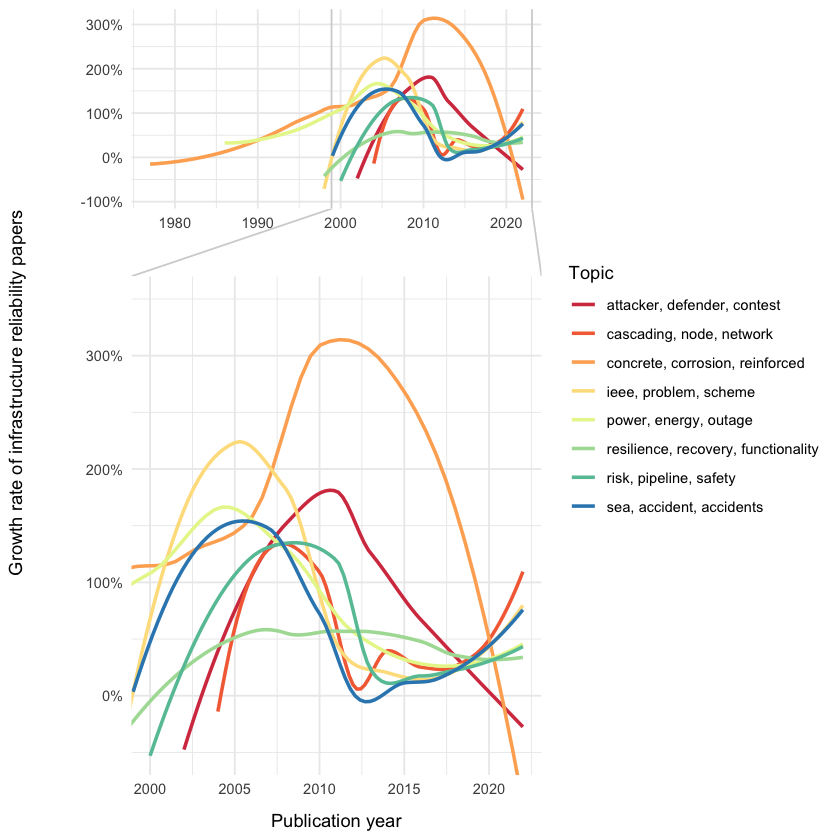

In [265]:
plot_growth("data/subtopics_infrastructure.csv", "figures/res_infrastructure_topic_growth.svg", "infrastructure", ylim=c(-0.5, 3.5))

Rows: 2204 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (12): sub_label, doc_id, doi, title, abstract, doc_type, publisher, sour...
dbl  (4): sub_topic_id, year, topic_id, examples

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


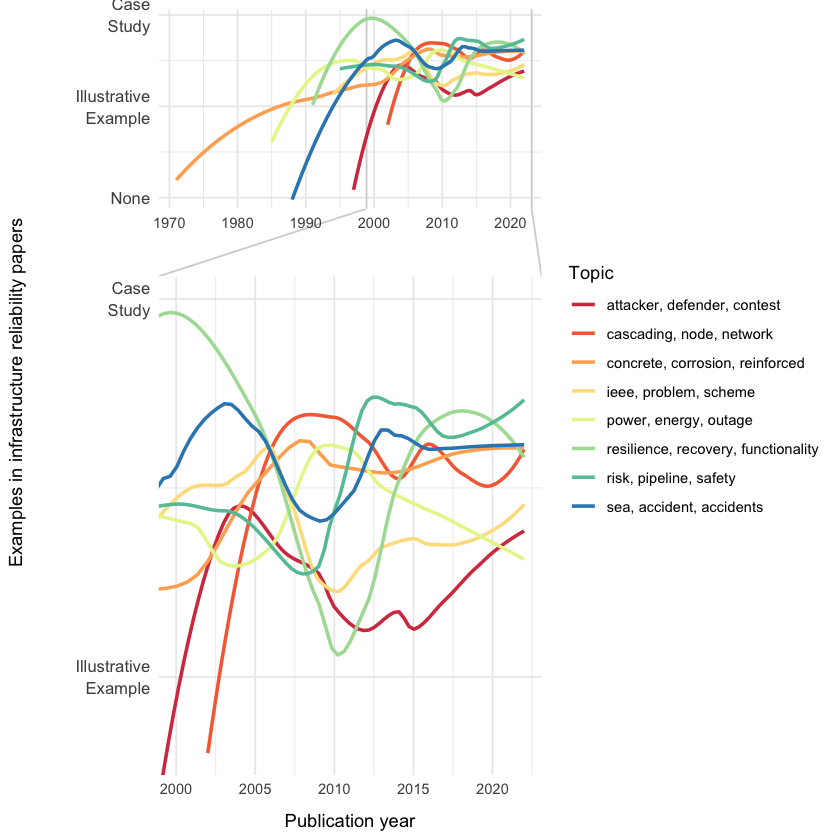

In [261]:
plot_examples("data/subtopics_infrastructure.csv", "figures/res_infrastructure_example_score.svg", "infrastructure", c(0.8, 2))

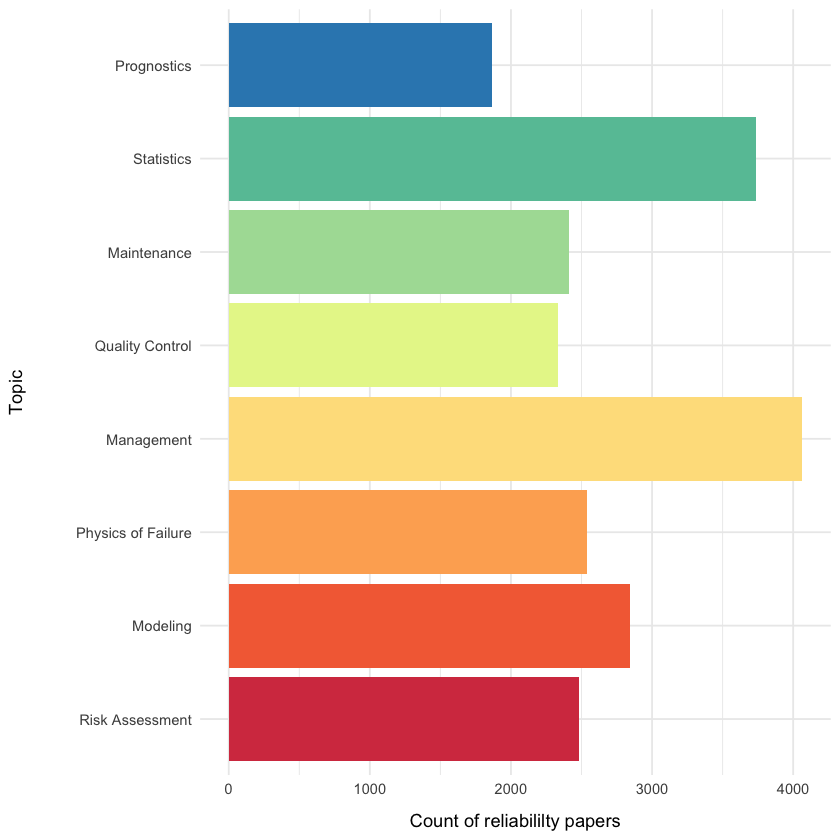

In [251]:
# Bar of counts by topic

filtered_df %>%
    ggplot(aes(y=factor(label_name, levels=topics), fill=factor(label_name, levels=topics))) +
    geom_bar() +
    scale_fill_brewer(palette="Spectral") +
  theme_minimal() +
  labs(
    x = "Count of reliabililty papers",
    y = "Topic",
    fill = "Topic",
  ) +
  theme(
    axis.title.y = element_text(margin = margin(t = 0, r = 30, b = 0, l = 0)),
    axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
    legend.position = "none"
    )

  ggsave("figures/res_topics_bar.svg", width=6, height=4, dpi=300)